# Machine Learning Model Building

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [5]:
# loading cleaned dataset
df = pd.read_csv('data/cleaned_spam.csv')
df.head()

,label,message,length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155
3,0,u dun say early hor u c already say,49
4,0,nah nt think go usf life around though,61


## Splitting the Data into Training and Testing Dataset

In [6]:
# splitting the dataset
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# check shape of the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


## TF-IDF

In [12]:
# vectorizing the input trainig dataset
tfidf = TfidfVectorizer()
X_train = X_train.fillna('')
X_train = tfidf.fit_transform(X_train)

In [15]:
# vectorizing the input testing dataset
X_test = X_test.fillna('')
X_test = tfidf.transform(X_test)

## Models Training and Evaluation

In [19]:
# models_name
models = ['LogisticRegression', 'SVC', 'MultinomialNB']

# models instances
lr = LogisticRegression()
svc = SVC()
mnb = MultinomialNB()
models_list = [lr, svc, mnb]

# training the model
for i,j in zip(models, models_list):
    print(f'Training {i} model')
    j.fit(X_train, y_train)
    y_pred = j.predict(X_test)
    print(f'Accuracy for "{i}": {accuracy_score(y_test, y_pred)*100}%')
    print(f'Classification Report for "{i}": \n{classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix for "{i}": \n{confusion_matrix(y_test, y_pred)}')
    print('='*55)

Training LogisticRegression model
Accuracy for "LogisticRegression": 94.61593682699211%
Classification Report for "LogisticRegression": 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1202
           1       0.96      0.63      0.76       191

    accuracy                           0.95      1393
   macro avg       0.95      0.81      0.87      1393
weighted avg       0.95      0.95      0.94      1393

Confusion Matrix for "LogisticRegression": 
[[1197    5]
 [  70  121]]
Training SVC model
Accuracy for "SVC": 97.4156496769562%
Classification Report for "SVC": 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1202
           1       0.99      0.82      0.90       191

    accuracy                           0.97      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Confusion Matrix for "SVC": 
[[1200    2]
 [  3

In [21]:
# final svm model
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(svc_pred)

[0 0 1 ... 0 0 0]


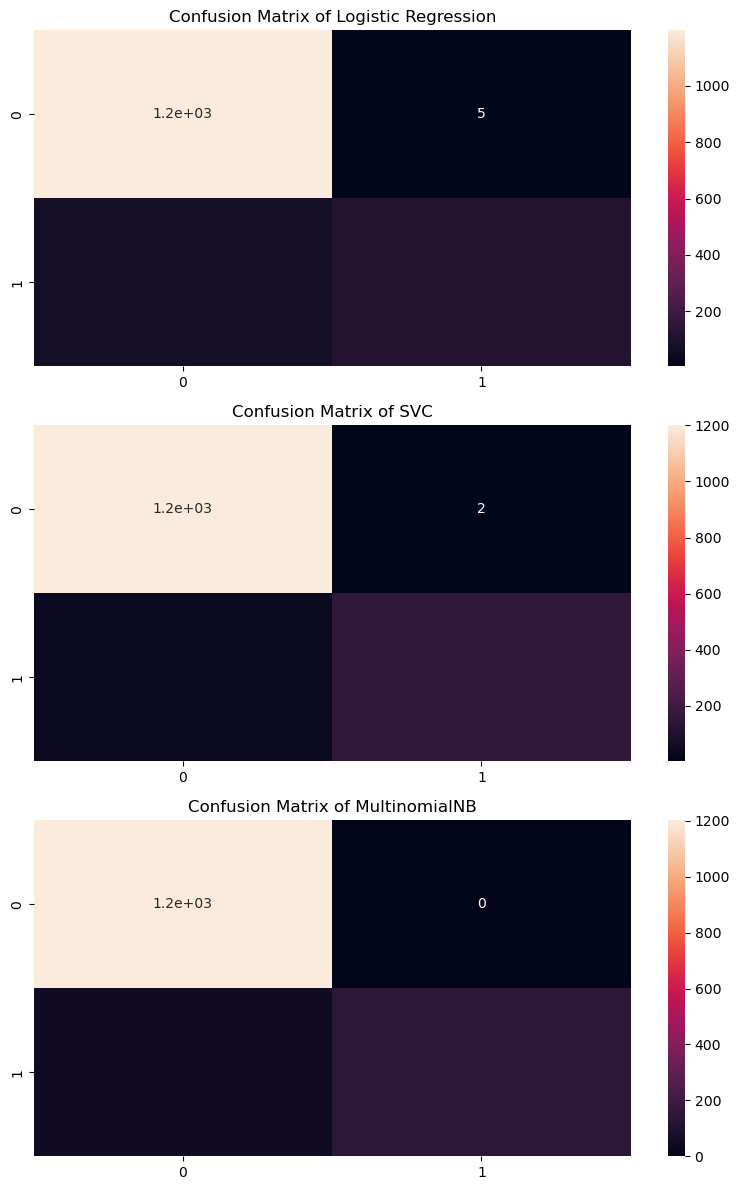

In [26]:
# confusion matrix visualization for all models
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)),annot=True)
plt.title('Confusion Matrix of Logistic Regression')

plt.subplot(3,1,2)
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test)),annot=True)
plt.title('Confusion Matrix of SVC')

plt.subplot(3,1,3)
sns.heatmap(confusion_matrix(y_test, mnb.predict(X_test)),annot=True)
plt.title('Confusion Matrix of MultinomialNB')

plt.tight_layout()


Conclusion : Now, we are able to see that "SVM" model perfrom extreamly amazing with accuracy score of 97.41% and with amazing classification report & confusion matrix. So, we are going to use it for our web application.

## Model Testing on New Data